<a href="https://colab.research.google.com/github/Amenasetheru/Deep-Learning-Projects/blob/main/Predicting_the_Bank_Customer_Satisfaction_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Bank Customer Satisfaction with CNN**

##Step 1 : Import Libraries

In [76]:
# Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import Input
from tensorflow.keras import Sequential
from imblearn.over_sampling import SMOTE
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization

In [4]:
# Visual adjustments
#sns.set(style="whitegrid")
#plt.rcParams['figure.figsize'] = (12, 6)

##Step 2 : Load and Explore Data

In [5]:
# Loading data
train_df = pd.read_csv("/content/drive/MyDrive/dataset/santander-customer-satisfaction/train.csv")

In [6]:
# Checking the first 5 rows of the train set
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
# Get the shape of train set
train_df.shape

(76020, 371)

In [8]:
# Getting infos on the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
# Checking data type
train_df.dtypes

,0
ID,int64
var3,int64
var15,int64
imp_ent_var16_ult1,float64
imp_op_var39_comer_ult1,float64
...,...
saldo_medio_var44_hace3,float64
saldo_medio_var44_ult1,float64
saldo_medio_var44_ult3,float64
var38,float64


In [10]:
# Checking descriptive statistics
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
# Checking missing values
train_df.isnull().sum()

,0
ID,0
var3,0
var15,0
imp_ent_var16_ult1,0
imp_op_var39_comer_ult1,0
...,...
saldo_medio_var44_hace3,0
saldo_medio_var44_ult1,0
saldo_medio_var44_ult3,0
var38,0


In [12]:
# Checking the target column distribution
train_df["TARGET"].value_counts()

,count
TARGET,
0,73012
1,3008


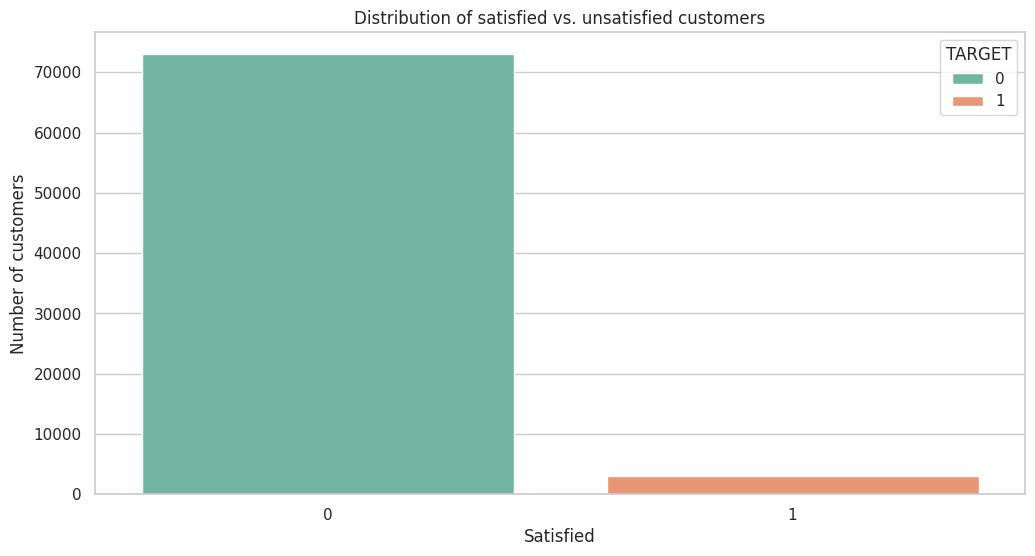

In [13]:
# Visualizing the target variable Distribution
sns.countplot(data=train_df, x="TARGET", hue="TARGET", palette="Set2")
plt.title("Distribution of satisfied vs. unsatisfied customers")
plt.xlabel("Satisfied")
plt.ylabel("Number of customers")
plt.show()

## Step 3:  Preprocess Data

In [40]:
# Deleting unnecessary columns and Getting the matrix of features
X = train_df.drop(labels=["ID", "TARGET"], axis=1)

In [41]:
# Getting the target variable
y = train_df["TARGET"]

In [42]:
# Removing zero variance features or Constant Features
def remove_constant_features(X, threshold=0.01):
    filter = VarianceThreshold(threshold=threshold)
    constant_filtered = filter.fit_transform(X)
    # Columns kept
    kept_columns = X.columns[filter.get_support()]
    # Columns deleted
    removed_columns = X.columns[~filter.get_support()]
    print(f"Constant features removed: {list(removed_columns)}")
    return pd.DataFrame(constant_filtered, columns=kept_columns, index=X.index)

In [43]:
# Removing Quasi-Constant Features
def remove_quasi_constant_features(X, threshold=0.01):
    quasi_constant = [col for col in X.columns
                      if X[col].value_counts(normalize=True).iloc[0] > (1 - threshold)]
    print(f"Quasi-constant feature removed: {quasi_constant}")
    return X.drop(columns=quasi_constant)

X = remove_constant_features(X)

Constant features removed: ['ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var6_0', 'ind_var6', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var6_0', 'num_var6', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var33', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace

In [44]:
# Removing Duplicate Features
def remove_duplicate_features(X):
    duplicated = X.T.duplicated()
    removed = X.columns[duplicated]
    print(f"Duplicate feature removed: {list(removed)}")
    return X.loc[:, ~duplicated]

X = remove_duplicate_features(X)

Duplicate feature removed: ['ind_var26', 'ind_var25', 'ind_var37', 'num_var26', 'num_var25', 'num_var32', 'num_var37', 'num_var39', 'saldo_var29', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'saldo_medio_var13_medio_ult1']


In [45]:
# Complete pipeline
def feature_selection_pipeline(X):
    X = remove_constant_features(X)
    X = remove_quasi_constant_features(X)
    X = remove_duplicate_features(X)
    return X

In [46]:
# Displaying data after applying the feature selection to our dats
print(f"Shape after applying feature selection to our data: {X.shape}")

Shape after applying feature selection to our data: (76020, 255)


In [47]:
# splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)

## Step 5: Applying SMOTE to your training data (X_train, y_train)








In [48]:
#4. Applying SMOTE on X_train only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [53]:
# Checking the new dimensions
print("Ancien shape :", X_train.shape)
print("Nouveau shape :", X_train_resampled.shape)
print("Nouveau shape :", y_train_resampled)
print("Répartition :", np.bincount(y_train_resampled))

Ancien shape : (60816, 255)
Nouveau shape : (116820, 255)
Nouveau shape : 0         0
1         1
2         0
3         0
4         0
         ..
116815    1
116816    1
116817    1
116818    1
116819    1
Name: TARGET, Length: 116820, dtype: int64
Répartition : [58410 58410]


In [58]:
# Normalizing Data (StandardScaler only on X_train then apply on X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Reshaping data for Conv1D
X_train_reshaped = tf.expand_dims(X_train_scaled, axis=-1)
X_test_reshaped = tf.expand_dims(X_test_scaled, axis=-1)
print("New shape for Conv1D: ", X_train_reshaped.shape)

New shape for Conv1D:  (116820, 255, 1)


In [61]:
# Shuffling the resampled data
#X_train_reshaped, y_train_resampled = shuffle(X_train_reshaped, y_train_resampled, random_state=42)

## Step 5 Model Building and Training



In [62]:
# Building the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))

model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [81]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [82]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 253, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 253, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 126, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 126, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 124, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 124, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 62, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 62, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 60, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       983,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,015,489 (3.87 MB)

 Trainable params: 1,015,041 (3.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [83]:
# Using Callback to stop training if validation no longer improves
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [66]:
# Training the model
history = model.fit(
    X_train_reshaped, y_train_resampled,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/10
2921/2921 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7301 - loss: 0.6109 - val_accuracy: 0.8071 - val_loss: 0.4233
Epoch 2/10
2921/2921 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.8077 - loss: 0.4342 - val_accuracy: 0.8414 - val_loss: 0.2736
Epoch 3/10
2921/2921 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8183 - loss: 0.4106 - val_accuracy: 0.8398 - val_loss: 0.3191
Epoch 4/10
2921/2921 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8269 - loss: 0.3908 - val_accuracy: 0.8348 - val_loss: 0.3197
Epoch 5/10
2921/2921 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8300 - loss: 0.3803 - val_accuracy: 0.8040 - val_loss: 0.4117


In [30]:
print("X_test shape:", X_test.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)


X_test shape: (15204, 255)
X_test_reshaped shape: (15204, 255, 1)


##Step 6: Evaluation on test data



In [67]:
# 1. Prédiction sur le set de test
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [69]:
# Classification Report
print("classification_report :\n")
print(classification_report(y_test, y_pred))

classification_report :

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     14602
           1       0.13      0.63      0.22       602

    accuracy                           0.82     15204
   macro avg       0.56      0.73      0.56     15204
weighted avg       0.95      0.82      0.87     15204



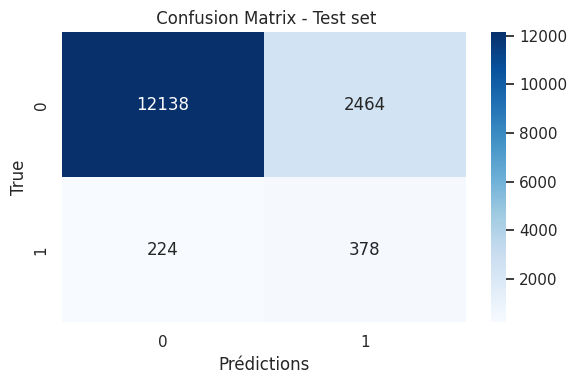

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Prédictions")
plt.ylabel("True")
plt.title(" Confusion Matrix - Test set")
plt.tight_layout()
plt.show()

##Step 7: Visualizing training curves (loss and accuracy)

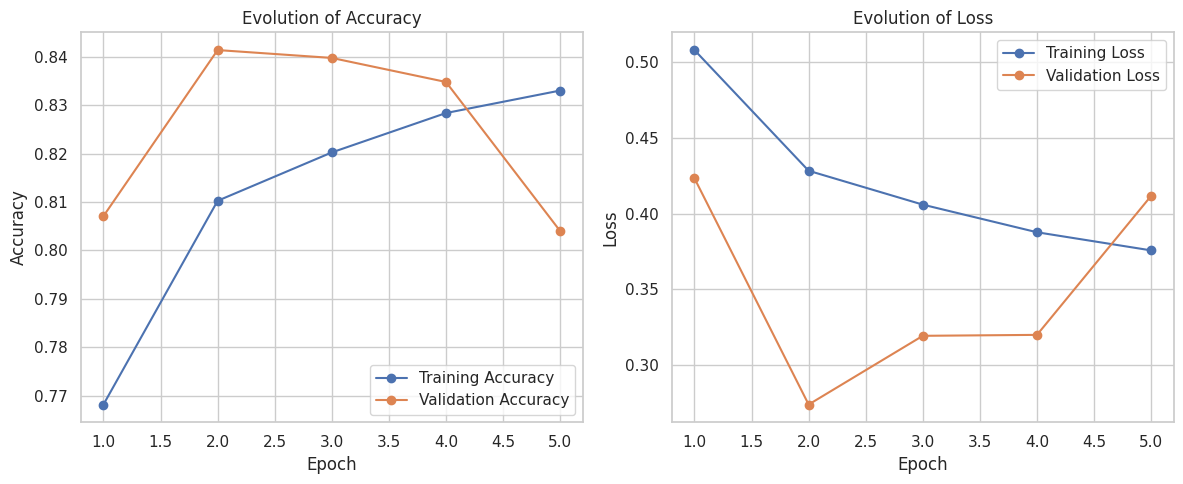

In [75]:
# History recovery
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Creating subgraphs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Evolution of Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Evolution of Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


##Step 8 : Saving the trained *model*

In [74]:
# Saving the trained model with joblib
import joblib
joblib.dump(scaler, "smoted_santander_model.joblib")


['smoted_santander_model.joblib']

In [73]:
# Saving the model
model.save("cnn_santander_model_smote.h5")